In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/ExternalDrive/2018-07-04-15-27-20/gm2offline_ana_9833879_16413.00023.root")
f.cd("clusterTree")
f.ls()

TFile**		./data/ExternalDrive/2018-07-04-15-27-20/gm2offline_ana_9833879_16413.00023.root	
 TFile*		./data/ExternalDrive/2018-07-04-15-27-20/gm2offline_ana_9833879_16413.00023.root	


Error in <TFile::TFile>: file ./data/ExternalDrive/2018-07-04-15-27-20/gm2offline_ana_9833879_16413.00023.root does not exist
Error in <TFile::cd>: Unknown directory clusterTree


In [3]:
t = f.Get("clusterTree").Get("clusters")
t.Print()

AttributeError: 'TObject' object has no attribute 'Get'

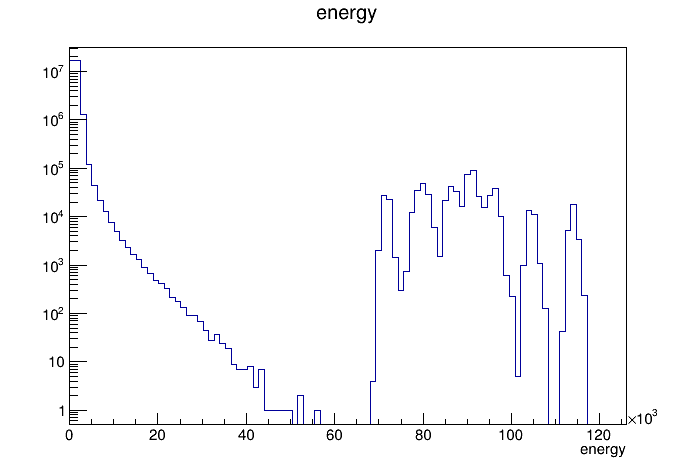

In [23]:
c = r.TCanvas()
t.Draw("energy")
c.Draw()

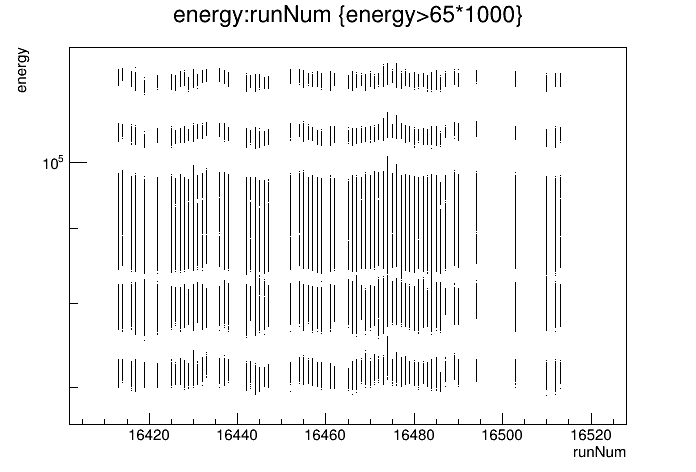

In [16]:
c = r.TCanvas()
nEntries = t.Draw("energy:runNum","energy>65*1000")
c.SetLogy()
c.Draw()

In [19]:
energyVec = t.GetV1()
runNumVec = t.GetV2()
energyVec = list(energyVec[n] for n in range(nEntries+1))
runNumVec = list(runNumVec[n] for n in range(nEntries+1))

In [20]:
print(energyVec[2],runNumVec[2])

91505.86852317561 16413.0


In [22]:
initialRunNum = runNumVec[0]
energyTotal = 0.0
countTotal = 0

averageEnergyVec = []

for i, energy in enumerate(energyVec):
    runNum = runNumVec[i]
    if(initialRunNum == runNum):
        energyTotal = energyTotal + energy
        countTotal = countTotal + 1
    else:
        averageEnergy = energyTotal / countTotal
        averageEnergyVec.append( (averageEnergy, initialRunNum, countTotal) )
        energyTotal = energy
        countTotal = 1
        
    initialRunNum = runNum
    
print(averageEnergyVec)

[(88878.59839492706, 16413.0, 4080), (88709.98244532247, 16437.0, 6960), (88374.44086524828, 16442.0, 4128), (88463.93528544449, 16470.0, 4080), (88573.29238793366, 16430.0, 4032), (88570.83201701482, 16456.0, 4128), (87988.84603366005, 16512.0, 4080), (88346.40253353766, 16427.0, 4128), (88911.20203234974, 16414.0, 4080), (88606.5053021813, 16485.0, 4080), (89291.40936173574, 16474.0, 4128), (88273.8917219619, 16459.0, 4080), (88111.36565555498, 16417.0, 4080), (88778.8661972151, 16432.0, 4128), (88570.6382930873, 16513.0, 4080), (88717.72121526205, 16455.0, 4224), (88437.96788319887, 16427.0, 4128), (88666.82065393472, 16477.0, 4128), (88950.04170399146, 16475.0, 4080), (88810.75006669495, 16413.0, 4080), (88552.02961367268, 16484.0, 4128), (88373.23857423024, 16466.0, 4128), (88583.87581136319, 16484.0, 4128), (88329.90675079451, 16422.0, 4080), (88219.6272777383, 16444.0, 4128), (88652.48047750363, 16490.0, 4080), (88612.07680308525, 16487.0, 4080), (88834.05909687412, 16431.0, 412

Ok, so we know that the algorithm works at this point, so now we just need to loop over all of the files in the list. This was done on the virtual machines to save time (and so that we didn't have to copy over these files just for this). The output file created was laserVsRunNum.csv

In [4]:
laserData1 = pandas.read_csv("./data/laserVsRunNum_2.csv")
laserData2 = laserData1.loc[laserData1['totalEntries'] > 10]
#laserData = laserData2.drop_duplicates(subset='RunNum',keep=False)

In [5]:
print(len(laserData2.index))

29139


In [6]:
print(laserData2['RunNum'][1])
print(laserData2['RunNum'][1000])
print(laserData2['RunNum'][10000])
print(laserData2['RunNum'].iloc[10000])

16437.0
16465.0
16466.0
16454.0


In [7]:
laserData = pandas.DataFrame(columns=['AverageEnergy','RunNum','totalEntries'])

print(len(laserData2.index), "Rows Total")
length = len(laserData2.index)
for i in range(length):
    if (i % 100 == 0):
        print("    ",i,"Rows Processed")
    runNumi = laserData2['RunNum'].iloc[i]
    dupCount = laserData2['totalEntries'].iloc[i]
    weightedE = laserData2['AverageEnergy'].iloc[i]*laserData2['totalEntries'].iloc[i]
    for j in range(length):
        runNumj = laserData2['RunNum'].iloc[j]
        if(runNumj == runNumi):
            weightedE = weightedE + laserData2['AverageEnergy'].iloc[j]*laserData2['totalEntries'].iloc[j]
            dupCount = dupCount + laserData2['totalEntries'].iloc[j]
    trueE = weightedE / dupCount
    ding = pandas.DataFrame([[trueE,runNumi,dupCount]],columns=['AverageEnergy','RunNum','totalEntries'])
    laserData = laserData.append(ding,ignore_index=True)
    
laserData = laserData.drop_duplicates(subset='RunNum')

29139 Rows Total
     0 Rows Processed
     100 Rows Processed
     200 Rows Processed
     300 Rows Processed
     400 Rows Processed
     500 Rows Processed
     600 Rows Processed
     700 Rows Processed
     800 Rows Processed
     900 Rows Processed
     1000 Rows Processed
     1100 Rows Processed
     1200 Rows Processed
     1300 Rows Processed
     1400 Rows Processed
     1500 Rows Processed
     1600 Rows Processed
     1700 Rows Processed
     1800 Rows Processed
     1900 Rows Processed
     2000 Rows Processed
     2100 Rows Processed
     2200 Rows Processed
     2300 Rows Processed
     2400 Rows Processed
     2500 Rows Processed
     2600 Rows Processed
     2700 Rows Processed
     2800 Rows Processed
     2900 Rows Processed
     3000 Rows Processed
     3100 Rows Processed
     3200 Rows Processed
     3300 Rows Processed
     3400 Rows Processed
     3500 Rows Processed
     3600 Rows Processed
     3700 Rows Processed
     3800 Rows Processed
     3900 Rows Proce

In [9]:
laserData.head()

,AverageEnergy,RunNum,totalEntries
0,88739.305804,16413.0,880753
1,88934.647346,16437.0,2136288
2,88120.729894,16442.0,1894656
3,88511.525510,16470.0,1491312
4,88760.211340,16430.0,1131601


In [ ]:
laserData = laserData.loc[laserData['AverageEnergy']<1000000000]
laserData.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(laserData['RunNum'],laserData['AverageEnergy']/1000,linestyle='',marker='o',markersize='5')
plt.xlabel("Run Number",size=15)
plt.ylabel("Energy (GeV)",size=15)
plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV) vs. Run Number")
plt.show()

Now that we have this version, lets break it down calo by calo

In [16]:
laserDataByCalo1 = pandas.read_csv("./data/laserVsRunNum_calo.csv")
laserDataByCalo2 = laserDataByCalo1.loc[laserDataByCalo1['totalEntries'] > 10]

In [17]:
laserDataByCalo = laserDataByCalo2

In [18]:
laserDataByCalo.head()

,AverageEnergy,RunNum,totalEntries,caloNum
0,90189.682383,16413.0,170,1
1,89961.906599,16437.0,290,1
2,89571.504607,16442.0,172,1
3,89809.763176,16470.0,170,1
4,90005.132944,16430.0,168,1


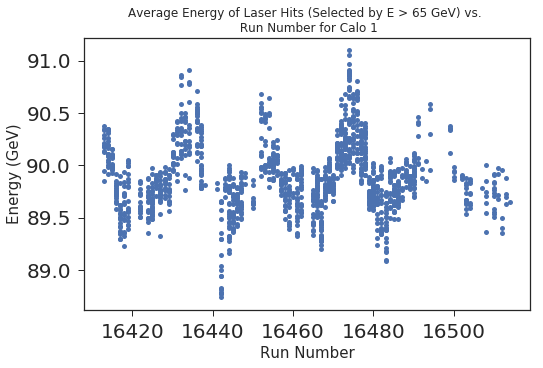

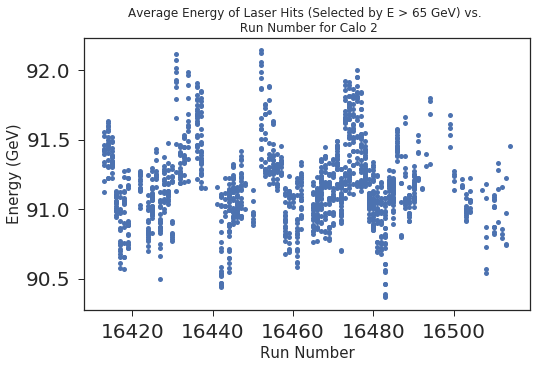

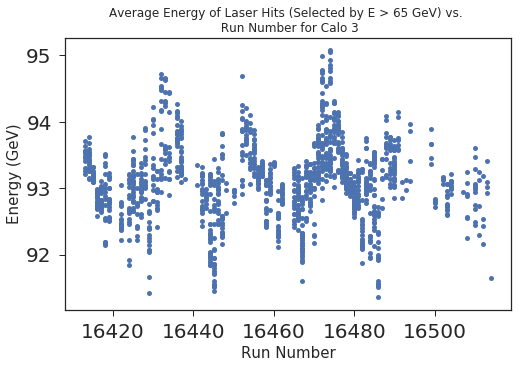

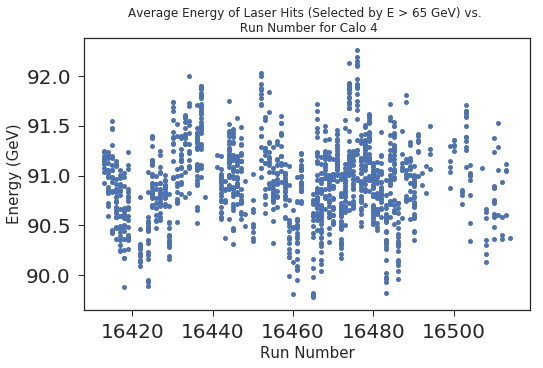

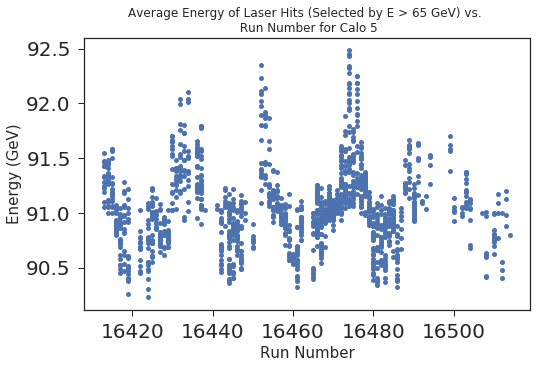

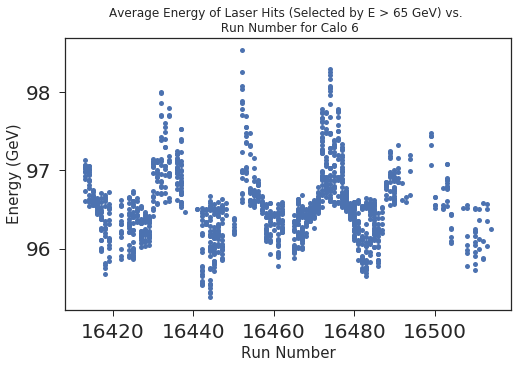

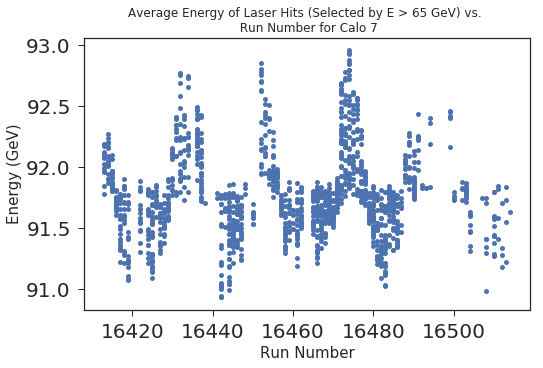

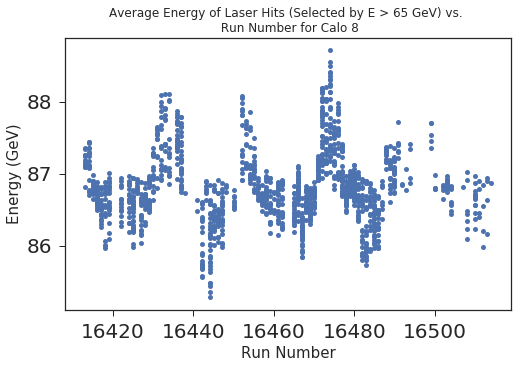

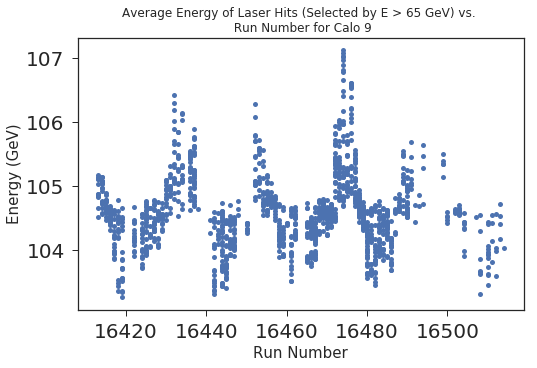

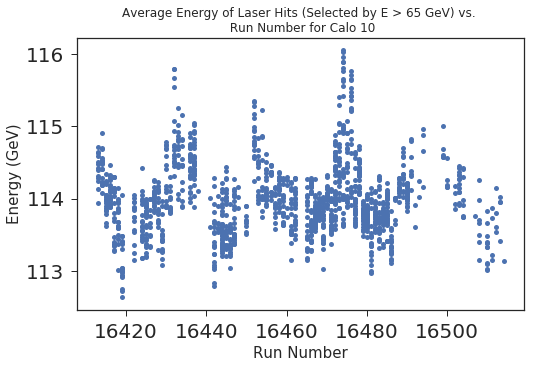

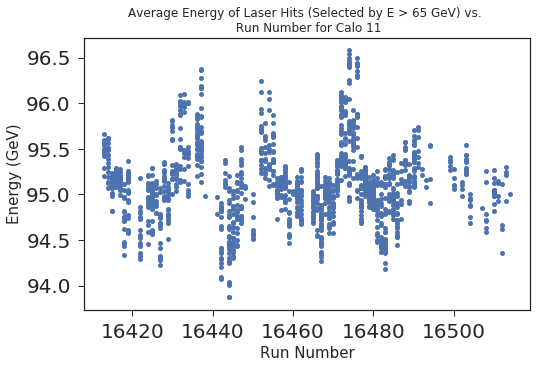

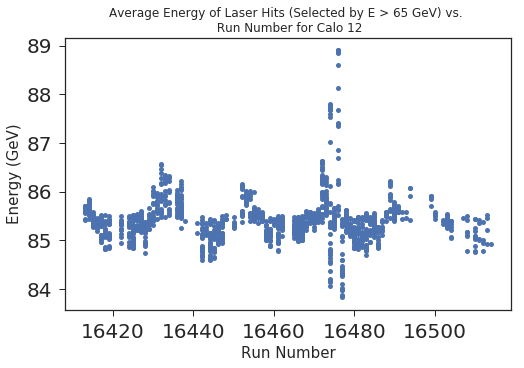

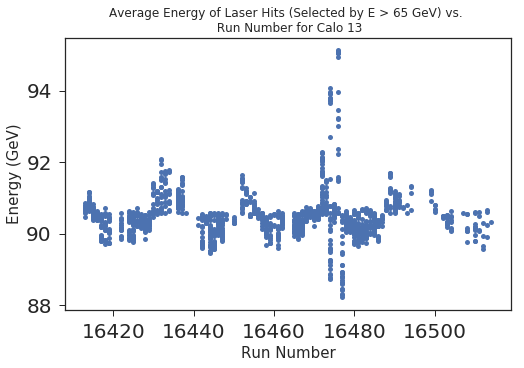

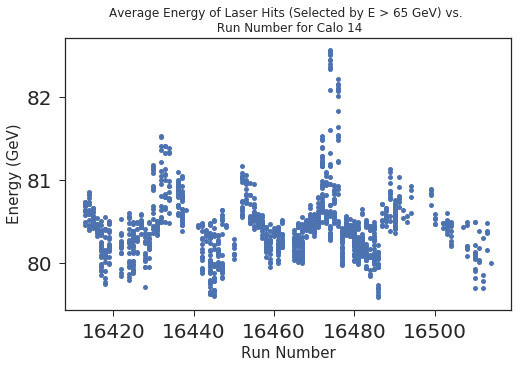

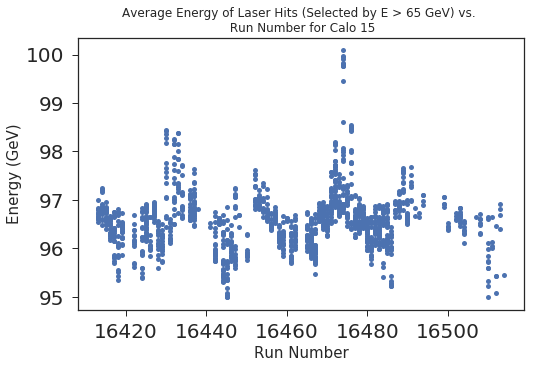

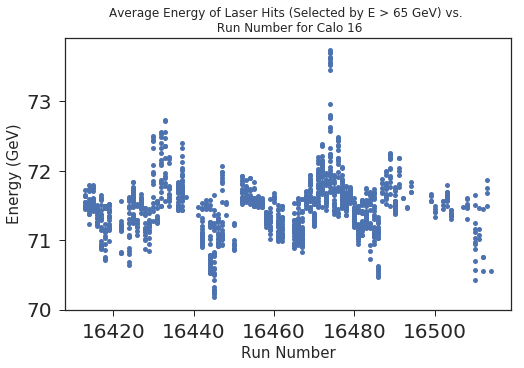

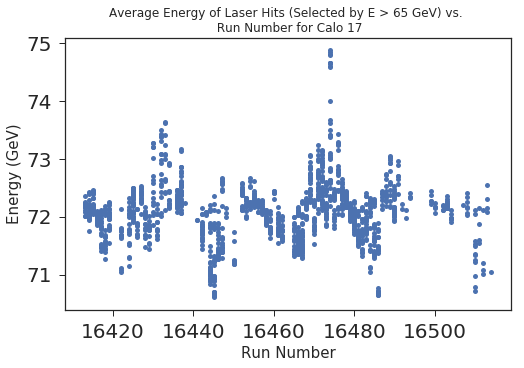

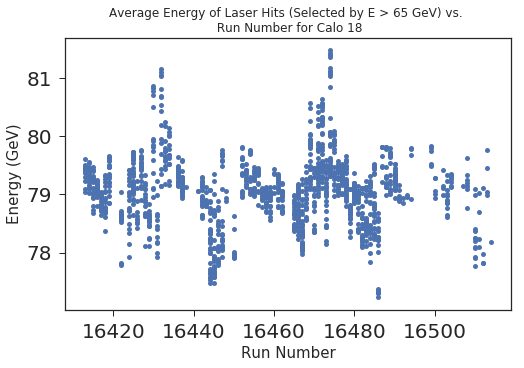

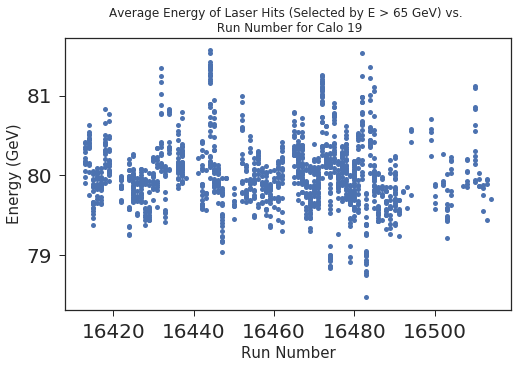

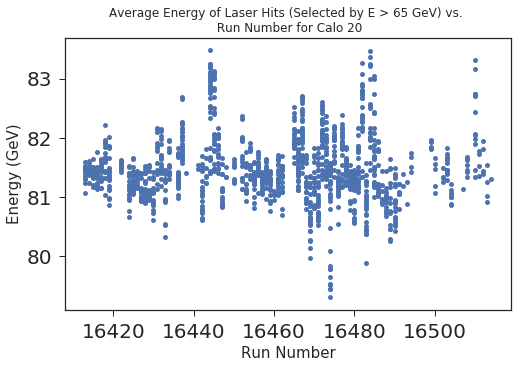

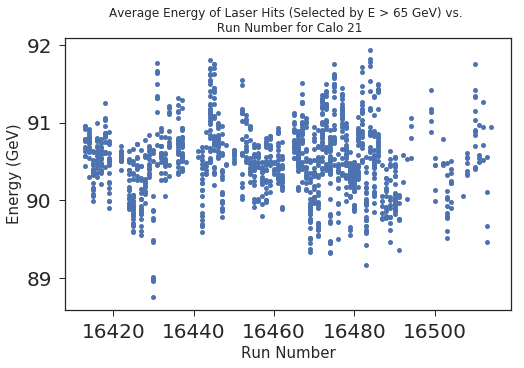

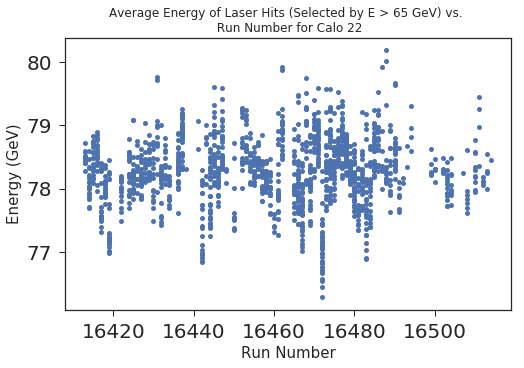

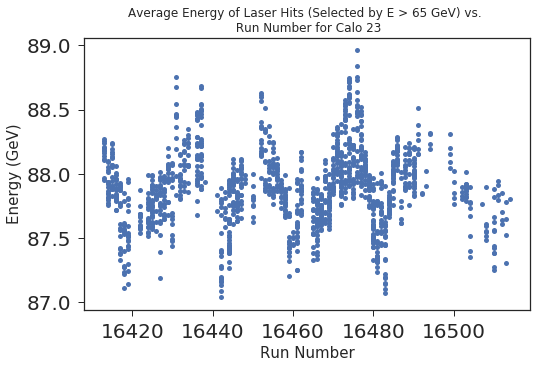

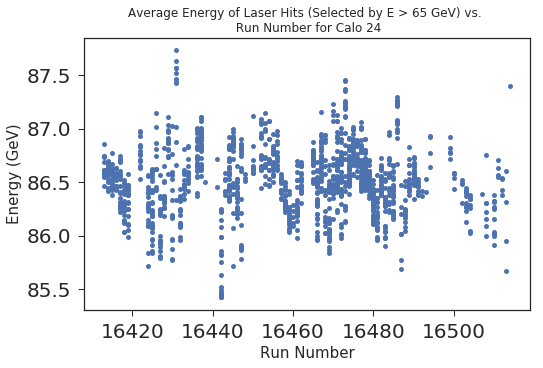

In [33]:
for calo in range(1,25):
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot(laserDataByCalo['RunNum'].loc[laserDataByCalo['caloNum'] == calo],(laserDataByCalo['AverageEnergy'].loc[laserDataByCalo['caloNum'] == calo])/1000,linestyle='',marker='o',markersize='5')
    plt.xlabel("Run Number",size=15)
    plt.ylabel("Energy (GeV)",size=15)
    plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV) vs. \n Run Number for Calo "+str(calo))
#    plt.ylim(65,120)
#    plt.savefig("./images/LaserVsRunNum/LaserVsRunNum_calo"+str(calo).zfill(2)+".png")
    plt.show()

In [ ]:
laserDataByCalo = pandas.DataFrame(columns=['AverageEnergy','RunNum','totalEntries','caloNum'])

print(len(laserDataByCalo2.index), "Rows Total")
length = len(laserDataByCalo2.index)
for i in range(length):
    for calo in range(1,25):
        if(laserDataByCalo2['caloNum'].iloc[i] == calo):
            if (i % 100 == 0):
                print("    ",i,"Rows Processed")
            runNumi = laserDataByCalo2['RunNum'].iloc[i]
            dupCount = laserDataByCalo2['totalEntries'].iloc[i]
            weightedE = laserDataByCalo2['AverageEnergy'].iloc[i]*laserDataByCalo2['totalEntries'].iloc[i]
            for j in range(length):
                runNumj = laserDataByCalo2['RunNum'].iloc[j]
                if(runNumj == runNumi && laserDataByCalo2['caloNum'].iloc[j] == calo):
                    weightedE = weightedE + laserDataByCalo2['AverageEnergy'].iloc[j]*laserDataByCalo2['totalEntries'].iloc[j]
                    dupCount = dupCount + laserDataByCalo2['totalEntries'].iloc[j]
            trueE = weightedE / dupCount
            ding = pandas.DataFrame([[trueE,runNumi,dupCount,calo]],columns=['AverageEnergy','RunNum','totalEntries','caloNum'])
            laserDataByCalo = laserDataByCalo.append(ding,ignore_index=True)
    
laserDataByCalo = laserDataByCalo.drop_duplicates(subset='RunNum')